# 対象軸上の解の分布比較
計算力学特論のreport3のポアソン方程式の解析結果について、講義資料の「0_矢川_計算力学.pdf」にある図7-8と同じ図を作成し比較する。

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd

#### データ読み込み（x軸上の分布）
x軸上の解の分布データを任意の自由度 "NDOF" より指定することで読み込む。

In [144]:
NDOF = 25
data_x = []
data_y = []
with open(f"poisson{NDOF}/on_axis.dat", 'r')as f:
    for line in f:
        data_temp=line.split()
        data_x.append(data_temp[0])
        data_y.append(data_temp[1])

data_x = [float(i) for i in data_x]
data_y = [float(i) for i in data_y]
print(data_x)
print(data_y)

[-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
[0.0, 0.0289721568841967, 0.04962492934376308, 0.06342194992979958, 0.07151468738034021, 0.07484802071367354, 0.07151468738034021, 0.06342194992979958, 0.04962492934376308, 0.0289721568841967, 0.0]


In [145]:
NDOF = 4
data_x_4 = []
data_y_4 = []
with open(f"poisson{NDOF}/on_axis.dat", 'r')as f:
    for line in f:
        data_temp=line.split()
        data_x_4.append(data_temp[0])
        data_y_4.append(data_temp[1])

data_x_4 = [float(i) for i in data_x_4]
data_y_4 = [float(i) for i in data_y_4]
print(data_x_4)
print(data_y_4)

[-0.5, -0.25, 0.0, 0.25, 0.5]
[0.0, 0.057291666666666664, 0.07812499999999999, 0.057291666666666664, 0.0]


In [146]:
NDOF = 1
data_x_1 = []
data_y_1 = []
with open(f"poisson{NDOF}/on_axis.dat", 'r')as f:
    for line in f:
        data_temp=line.split()
        data_x_1.append(data_temp[0])
        data_y_1.append(data_temp[1])

data_x_1 = [float(i) for i in data_x_1]
data_y_1 = [float(i) for i in data_y_1]
print(data_x_1)
print(data_y_1)

[-0.5, 0.0, 0.5]
[0.0, 0.08333333333333333, 0.0]


#### 厳密解の作成

#### 図作成（対称軸上の解分布）

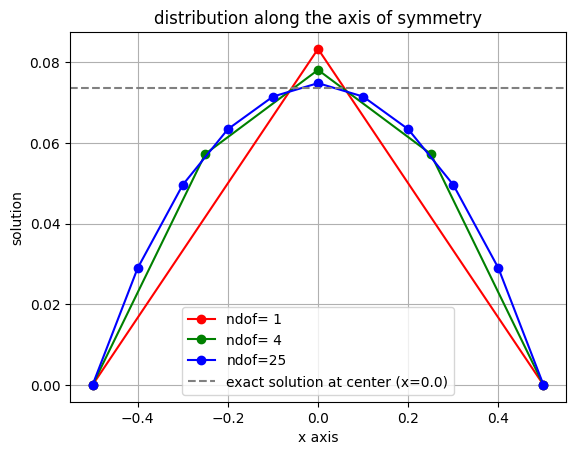

In [147]:
fig, ax = plt.subplots()

ax.plot(data_x_1, data_y_1, marker='o', color='r')
ax.plot(data_x_4, data_y_4, marker='o', color='g')
ax.plot(data_x, data_y, marker='o', linestyle='-', color='b')
ax.axhline(y=0.07367, linestyle='--', color='gray')

ax.set_title('distribution along the axis of symmetry')
ax.set_xlabel('x axis')
ax.set_ylabel('solution')
ax.legend(['ndof= 1', 'ndof= 4','ndof=25','exact solution at center (x=0.0)'])

ax.grid()
plt.show()

#### 領域中心の解の比較
正方形領域における中心の値を厳密解と有限要素法による数値解で比較する。有限要素法は複数の自由度での解析結果を比較する。

#### データ読み込み（領域中心の値）

In [148]:
list = [1,4,25]
data_cen = []
for i in list:
    with open(f"poisson{i}/center.dat", 'r')as f:
        for line in f:
            data_temp = line.split()
            data_cen.append(data_temp)

data_cen = [[int(item[0]), float(item[1])] for item in data_cen]
print(data_cen)


[[1, 0.08333333333333333], [4, 0.07812499999999999], [25, 0.07484802071367354]]


In [149]:
# for i in range(0,3,1):
#     data_cen[i][0] = 'ndof:' + data_cen[i][0]
#     data_cen[i][]

df = pd.DataFrame(data_cen)
df_T = df.T
print(df_T)

          0         1          2
0  1.000000  4.000000  25.000000
1  0.083333  0.078125   0.074848


#### 自由度数と数値解の収束
自由度数を増やして解析を行い、数値解の収束を確認する。

In [150]:
data_con = []
for i in range(1,11,1):
    j = i**2
    with open(f"poisson{j}/center.dat", 'r')as f:
        for line in f:
            data_con.append(line.split())

# for i in range(2,6,1):
#     j = (i*10)**2
#     with open(f"poisson{j}/center.dat", 'r')as f:
#         for line in f:
#             data_con.append(line.split())

# with open(f"poisson{10000}/center.dat", 'r')as f:
#         for line in f:
#             data_con.append(line.split())

data_con = [[int(item[0]), float(item[1])] for item in data_con]

data_con_x = []
data_con_y = []

for i in range(len(data_con)) :
    data_con_x.append(data_con[i][0])
    data_con_y.append(data_con[i][1])

print(data_con_x)
print(data_con_y)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
[0.08333333333333333, 0.07812499999999999, 0.07621080484326971, 0.07532935049019603, 0.07484802071367354, 0.07455451710082997, 0.07436148811447606, 0.07422713801727798, 0.07412965995623229, 0.07405646099663163]


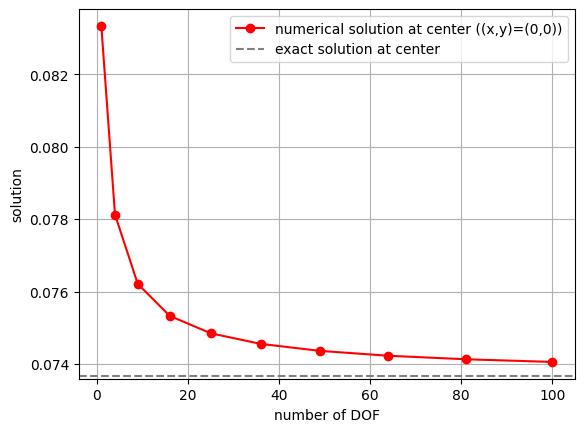

In [151]:
fig_3, ax_3 = plt.subplots()

ax_3.plot(data_con_x, data_con_y, marker='o', color='r')
ax_3.axhline(y=0.07367, linestyle='--', color='gray')

ax_3.set_xlabel('number of DOF')
ax_3.set_ylabel('solution')
ax_3.legend(['numerical solution at center ((x,y)=(0,0))','exact solution at center'])

ax_3.grid()
plt.show()